<a href="https://colab.research.google.com/github/Juribe7980/Project-1/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 2

Jessica Uribe

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

Deleted unnecessary columns.
Deleted duplicate rows.
Identified and addressed missing values.
Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
Produced univariate visuals for the target and all features.
Identified outliers.
Clearly commented all of your cleaning steps and described any decisions you made.
Commit your file to your Github repository and submit the link below.

In [18]:
## Pandas
import pandas as pd
#Seaborn
import seaborn as sns
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

## Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay

from sklearn.model_selection import GridSearchCV

## Import SMOTE
from imblearn.over_sampling import SMOTE
## Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

from sklearn import metrics

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Week 5(JJ) Regression and classification/wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [3]:
## Display the first (5) rows
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
## Display all columns
pd.set_option('display.max_column', None)

In [5]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 7500 rows, and 11 columns.
The rows represent 7500 observations, and the columns represent 10 features and 1 target variable.


In [6]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [7]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [8]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 5452 duplicate rows.


In [9]:
## Drop duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- All duplicate rows have been dropped.

Inspect Column Names for Errors

- Check for common syntax errors which may include extra white spaces at the 
beginning or end of strings or column names.

In [11]:
## Display column names
df.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

No errors noted.

### **Inspect Values for Errors**

Check for unusual or impossible values. (Example a weight, or height that is negative in value.)

In [12]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


- No unusual values noted.

Missing Values

In [13]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 650 missing values.


In [14]:
## If there are missing values we could
## Display the count of missing values by column
print(df.isna().sum())

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64


Model Validation Data Split

Create a copy of the database

In [15]:
## Create a copy of the dataset for Modeling
df = df.copy()

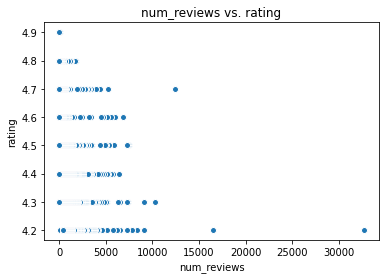

In [34]:
def my_scatterplot(df, x='num_reviews', y='rating'):
    fig, ax = plt.subplots()
    ax.scatter(df[x], df[y], edgecolor='white')
    ax.set(title=f'{x} vs. {y}', ylabel=y, xlabel=x);
    return fig, ax


fig, ax = my_scatterplot(df)


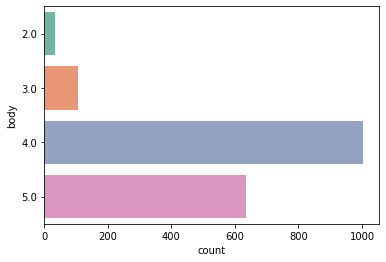

In [48]:
labels = ['body', 'acidity']
sns.countplot(y=df['body'], palette='Set2');

Check class balance

In [20]:
## Check how many samples of each class are present
df['rating'].value_counts(normalize=False)

4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64

In [21]:
## Check how many samples of each class are present
df['rating'].value_counts(normalize=True)

4.3    0.344727
4.4    0.236328
4.5    0.137207
4.2    0.111328
4.6    0.093262
4.7    0.054688
4.8    0.021484
4.9    0.000977
Name: rating, dtype: float64

Split the data

In [38]:
## Define features (X) and target (y)
target = 'rating'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

In [39]:
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [40]:
# select only object columns
categoricals = X_train.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

winery
Vega Sicilia               72
Alvaro Palacios            40
Artadi                     27
Dominio de Pingus          27
La Rioja Alta              25
                           ..
Rimarts                     1
Valtravieso                 1
Baluarte                    1
Marques de la Concordia     1
Ausas                       1
Name: winery, Length: 431, dtype: int64 

wine
Tinto                                 43
Unico                                 29
Valbuena 5o                           23
Priorat                               22
Reserva                               22
                                      ..
Canta la Perdiz                        1
Rias Baixas Albarino Finca Valinas     1
Palo Cortado de la Cruz de 1767        1
Perpetual                              1
Rioja B70                              1
Name: wine, Length: 710, dtype: int64 

year
2016    190
2017    172
2015    151
2018    143
2014    121
       ... 
1972      1
1931      1
1975      1
1922      1


In [41]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [42]:
# Selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [43]:
number_tuple=(scaler, num_selector)
category_tuple = (ohe, cat_selector)

In [44]:
##Create the preprocessir using make_Column transformer
preprocessor = make_column_transformer(category_tuple, 
                                       remainder='drop')